# Task 6: Linear Regression – House Price Prediction

In [1]:

import pandas as pd
df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This loads the housing dataset into a DataFrame.

In [2]:

df.dropna(inplace=True)


This removes missing values to ensure the model trains correctly.

In [3]:

df = pd.get_dummies(df, drop_first=True)


This converts categorical features into numerical form using One-Hot Encoding.

In [4]:

X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]


This separates input features and the continuous target variable.

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


This splits the dataset into training and testing sets.

In [6]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


This trains a Linear Regression model on the training data.

In [7]:

y_pred = model.predict(X_test)
y_pred[:5]


array([ 0.26149546,  0.04037538,  0.19338602, -0.00723836,  0.15708343])

This predicts house prices for unseen test data.

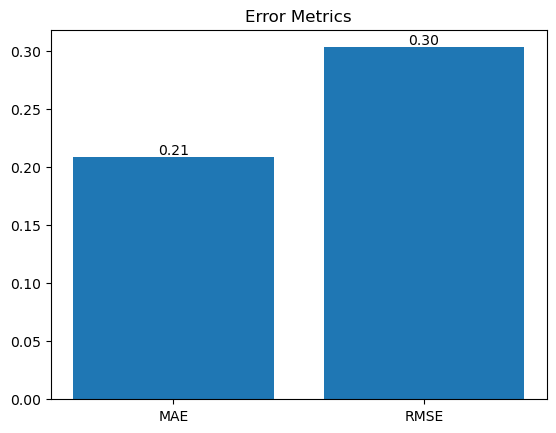

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

metrics = ["MAE", "RMSE"]
values = [mae, rmse]

plt.figure()
plt.bar(metrics, values)
plt.title("Error Metrics")

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.show()


MAE and RMSE measure how far predictions are from actual prices.

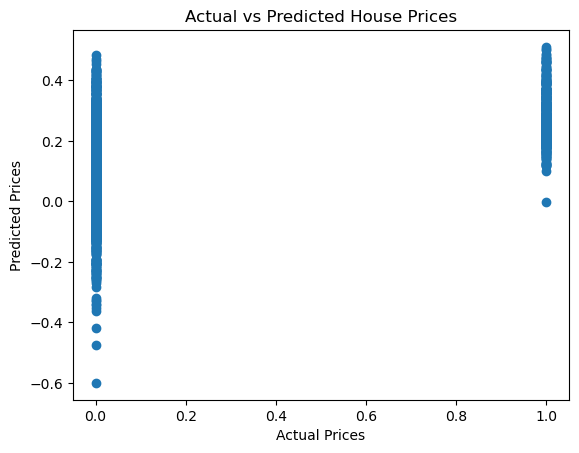

In [9]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


This plot visually compares predicted prices with actual prices.


## Coefficient Interpretation
Features with higher absolute coefficients have stronger influence on house prices.
